In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_62893/354864924.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['WKR_NR']):


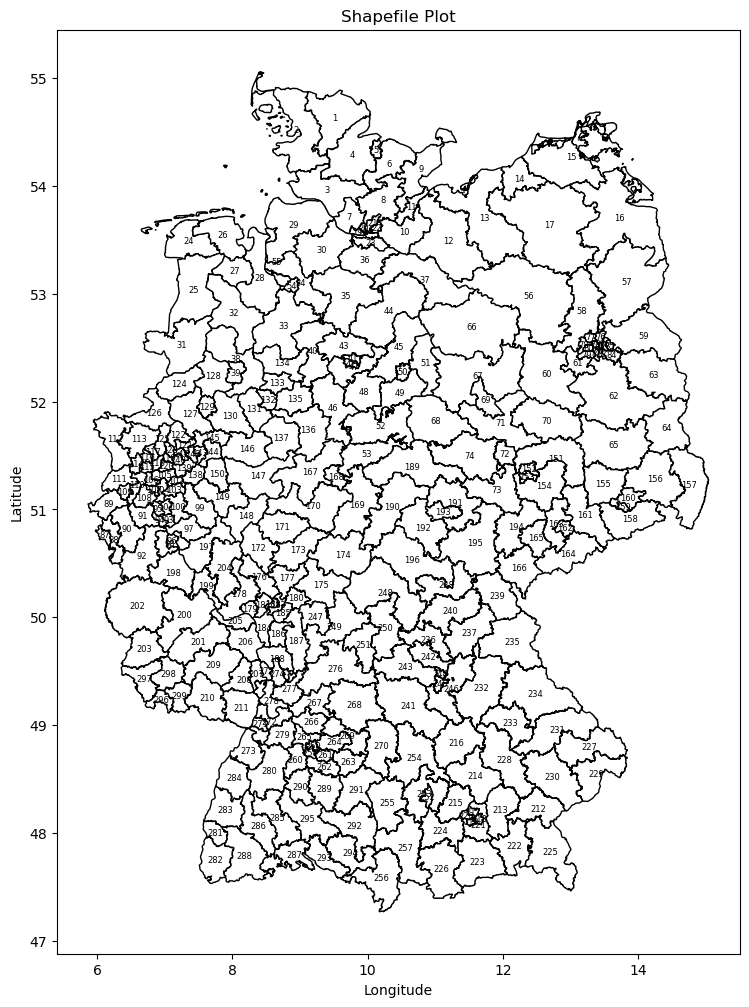

In [7]:
shapefile_path = "/Users/carlogress/Downloads/btw21_geometrie_wahlkreise_vg250_geo_shp/Geometrie_Wahlkreise_20DBT_VG250_geo.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='white', edgecolor='black')

# Add labels for each electoral district
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['WKR_NR']):
    ax.text(x, y, str(label), fontsize=6, ha='center', va='center', color='black')

# Customize the plot as needed
ax.set_title("Shapefile Plot")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

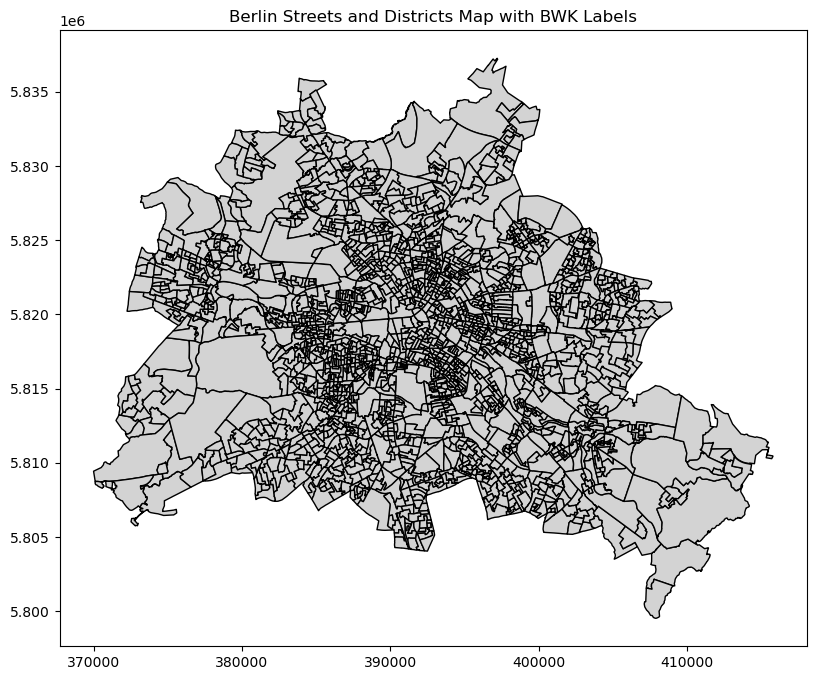

In [4]:
shapefile_path = "/Users/carlogress/Desktop/MA/Data sources/Berlin LOR-Räume/RBS_OD_UWB_AH21/RBS_OD_UWB_AH21.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the map with labels
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')



ax.set_title('Berlin Streets and Districts Map with BWK Labels')
plt.show()

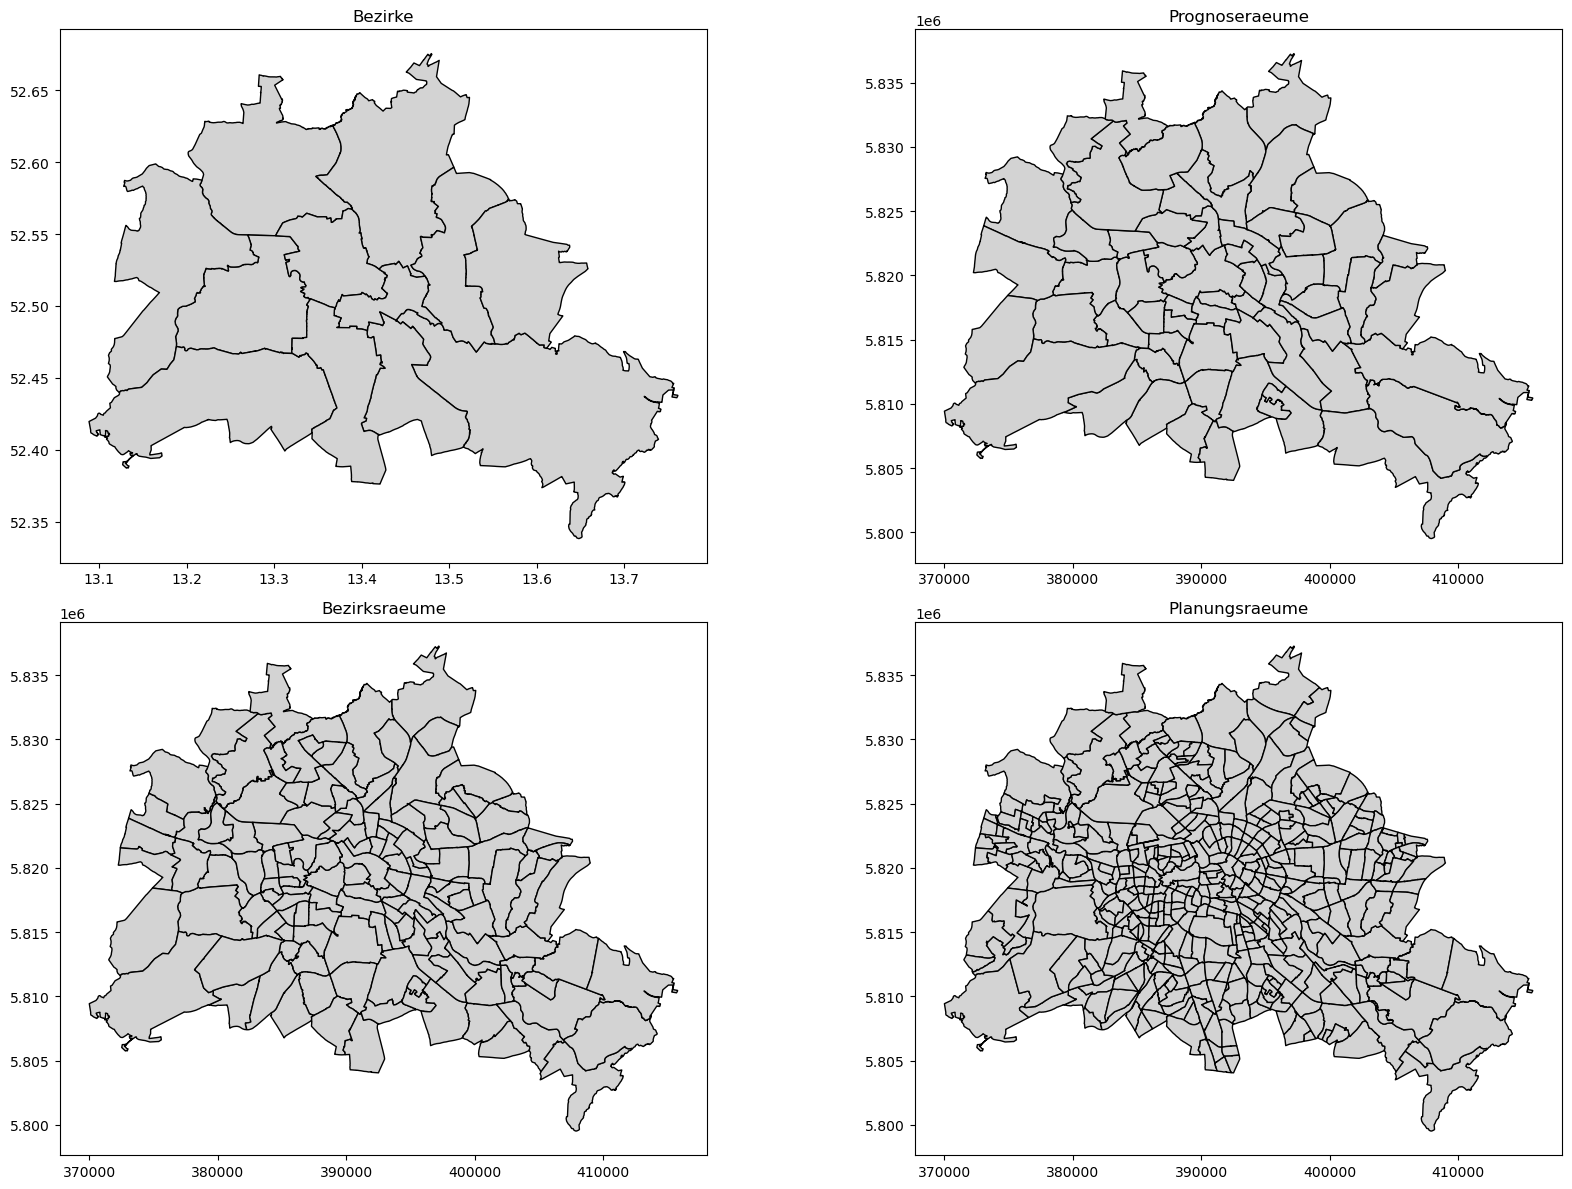

In [95]:
bezirke_path = "/Users/carlogress/Documents/MA/Data sources/bezirke/bezirksgrenzen.shp"
prognoseraeume_path = "/Users/carlogress/Documents/MA/Data sources/Berlin LOR-Räume/LOR_Räume_2020/lor_prognoseraeume.shp/lor_prognoseraeume.shp"
bezirksraeume_path = "/Users/carlogress/Documents/MA/Data sources/Berlin LOR-Räume/LOR_Räume_2020/lor_bezirksregionen.shp/lor_bezirksregionen.shp"
planungsraeume_path = "/Users/carlogress/Documents/MA/Data sources/Berlin LOR-Räume/LOR_Räume_2020/lor_planungsraeume.shp/lor_planungsraeume.shp"

bezirke = gpd.read_file(bezirke_path)
prognoseraeume = gpd.read_file(prognoseraeume_path)
bezirksraeume = gpd.read_file(bezirksraeume_path)
planungsraeume = gpd.read_file(planungsraeume_path)

fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'width_ratios': [2, 2], 'height_ratios': [2, 2]})

# Plot BEZIRKE
bezirke.plot(ax=axes[0, 0], color='lightgray', edgecolor='black')
axes[0, 0].set_title('Bezirke')

# Plot Prognoseraeume
prognoseraeume.plot(ax=axes[0, 1], color='lightgray', edgecolor='black')
axes[0, 1].set_title('Prognoseraeume')

# Plot Bezirksraeume
bezirksraeume.plot(ax=axes[1, 0], color='lightgray', edgecolor='black')
axes[1, 0].set_title('Bezirksraeume')

# Plot Planungsraeume
planungsraeume.plot(ax=axes[1, 1], color='lightgray', edgecolor='black')
axes[1, 1].set_title('Planungsraeume')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


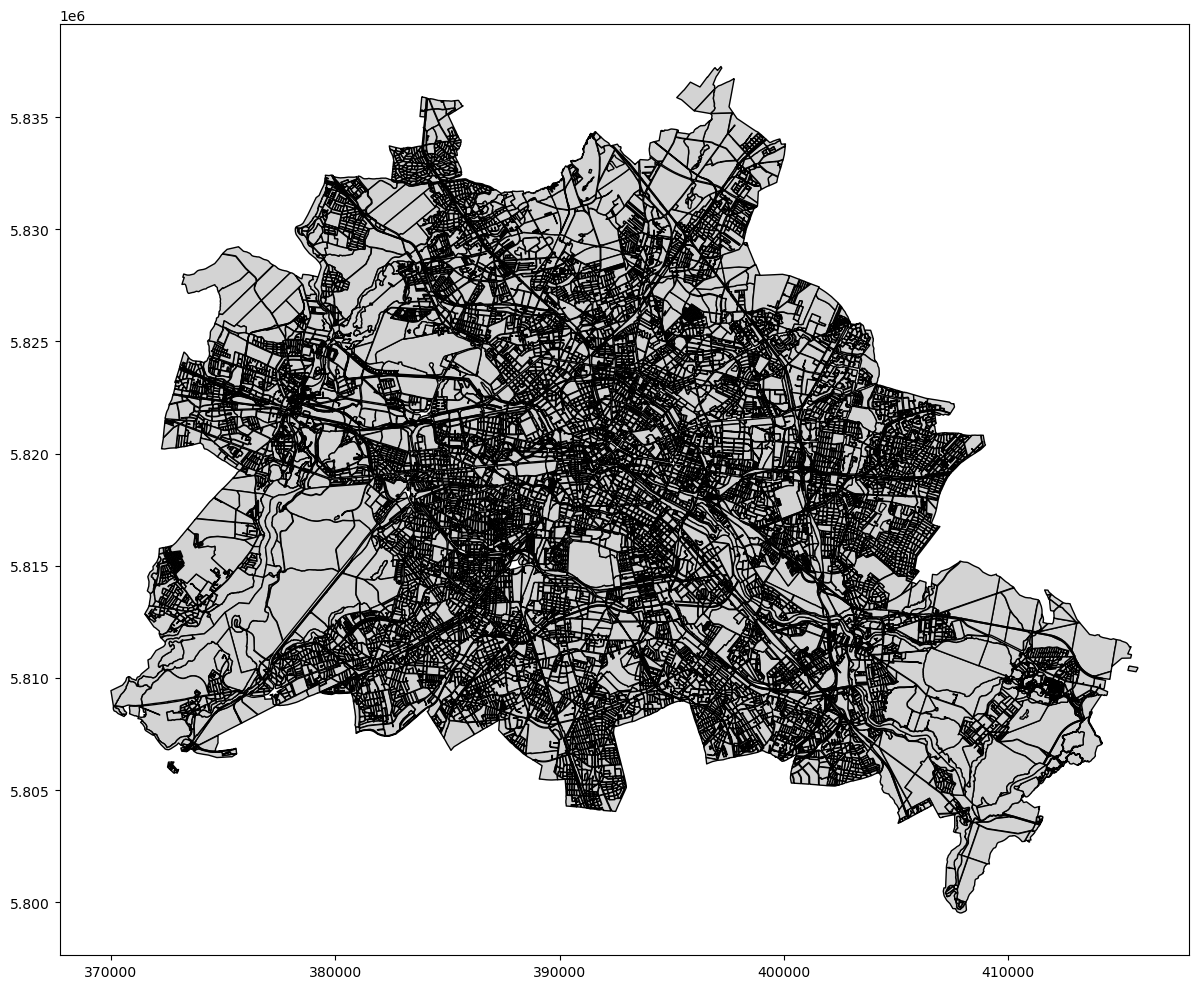

In [141]:
# Plotting Blockflächen

bloecke_path = "/Users/carlogress/Documents/MA/Data sources/bloecke16/RBS_OD_BLK_2016_12.shp"
bloecke = gpd.read_file(bloecke_path)

# Set a larger figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Plot Blockflächen
bloecke.plot(color='lightgray', edgecolor='black', ax=ax)

# Show the plot
plt.tight_layout()
plt.show()

In [146]:
import geopandas as gpd
import plotly.express as px
# Create an interactive map with Plotly Express
fig = px.choropleth_mapbox(
    bloecke,
    geojson=bloecke.geometry,
    locations=bloecke.index,
    color='BLK',  # You may need to adjust this depending on your data
    mapbox_style="carto-positron",
    center={"lat": bloecke.centroid.y.mean(), "lon": bloecke.centroid.x.mean()},  # Centered on the average coordinates
    zoom=10,
)

# Display the interactive map
fig.show()

KeyboardInterrupt: 

In [49]:
ewr_total = pd.read_csv("/Users/carlogress/Documents/MA/Data sources/Berlin LOR-Räume/ewr_total.csv", sep=";")
ewr_foreigners = pd.read_csv("/Users/carlogress/Documents/MA/Data sources/Berlin LOR-Räume/ewr_auslaender.csv", sep=";")

ewr_foreigners.head()
ewr_total.head()


ZEIT   RAUMID  BEZ  PGR  BZR  PLR  STADTRAUM   E_E  E_EM  E_EW  ...  \
0  202012  1011101    1    1   11    1          1  3419  1796  1623  ...   
1  202012  1011102    1    1   11    2          1   192   121    71  ...   
2  202012  1011103    1    1   11    3          1  5211  2783  2428  ...   
3  202012  1011104    1    1   11    4          1  4636  2563  2073  ...   
4  202012  1011105    1    1   11    5          1  1599   882   717  ...   

   E_E95_110  E_EU1  E_E1U6  E_E6U15  E_E15U18  E_E18U25  E_E25U55  E_E55U65  \
0          6     22     134      143        28       256      1708       377   
1          0      0       6        6         4        13        99        36   
2         24     39     225      306       102       417      2403       740   
3          3     40     216      410       112       528      2464       500   
4          0     16      76       88        43        92       883       204   

   E_E65U80  E_E80U110  
0       535        216  
1        19          9  
2       716        263  
3       303         63  
4       148         49  

[5 rows x 51 columns]

In [50]:
# Set 'RAUMID' as the index for both DataFrames
ewr_total = ewr_total.set_index('RAUMID')
ewr_foreigners = ewr_foreigners.set_index('RAUMID')

# Combine the DataFrames using combine_first
merged_ewr = ewr_total.combine_first(ewr_foreigners)

# Reset 'RAUMID' as a regular column
merged_ewr = merged_ewr.reset_index()

# Display the merged dataset
print(merged_ewr.head())

    RAUMID  BEZ  BZR   E_A  E_A00_01  E_A01_02  E_A02_03  E_A03_05  E_A05_06  \
0  1011101    1   11  1387         3         3         9        14         9   
1  1011102    1   11    73         0         0         3         0         0   
2  1011103    1   11  1853         0        16         9        19         6   
3  1011104    1   11  1787        10         9         6        19        12   
4  1011105    1   11   836        10         6         3        15         8   

   E_A06_07  ...  E_E85_90  E_E90_95  E_E95_110  E_EM  E_EU1  E_EW  PGR  PLR  \
0         3  ...        51        18          6  1796     22  1623    1    1   
1         0  ...         0         0          0   121      0    71    1    2   
2         3  ...        63        30         24  2783     39  2428    1    3   
3        14  ...        18        12          3  2563     40  2073    1    4   
4         9  ...        12         6          0   882     16   717    1    5   

   STADTRAUM    ZEIT  
0          1  2

In [51]:
# Assuming merged_ewr is the merged dataset with columns 'E_A', 'E_E', and 'BEZ'
# Calculate the total foreigners and total population for each 'BEZ'
grouped_ewr = merged_ewr.groupby('BEZ').agg({'E_A': 'sum', 'E_E': 'sum'})

# Calculate the proportion of foreigners for each 'BEZ'
grouped_ewr['foreigners_proportion'] = grouped_ewr['E_A'] / grouped_ewr['E_E']

# Display the result
print(grouped_ewr[['foreigners_proportion']])

     foreigners_proportion
BEZ                       
1                 0.341327
2                 0.280768
3                 0.148889
4                 0.254490
5                 0.211769
6                 0.154582
7                 0.206203
8                 0.261032
9                 0.109449
10                0.125850
11                0.185998
12                0.193625


In [52]:
# Calculating the proportion of foreigner in each bezirk 
merged_ewr['foreigners_proportion'] = merged_ewr['E_A'] / merged_ewr['E_E']



In [53]:
average_foreigners_proportion_total = merged_ewr['foreigners_proportion'].mean()
average_foreigners_proportion_by_bez = merged_ewr.groupby('BEZ')['foreigners_proportion'].mean()

print(average_foreigners_proportion_by_bez)
print(average_foreigners_proportion_total)

BEZ
1     0.353706
2     0.287527
3     0.143622
4     0.277006
5     0.197840
6     0.156282
7     0.192633
8     0.245179
9     0.108331
10    0.143243
11    0.184094
12    0.198609
Name: foreigners_proportion, dtype: float64
0.21062450537877855


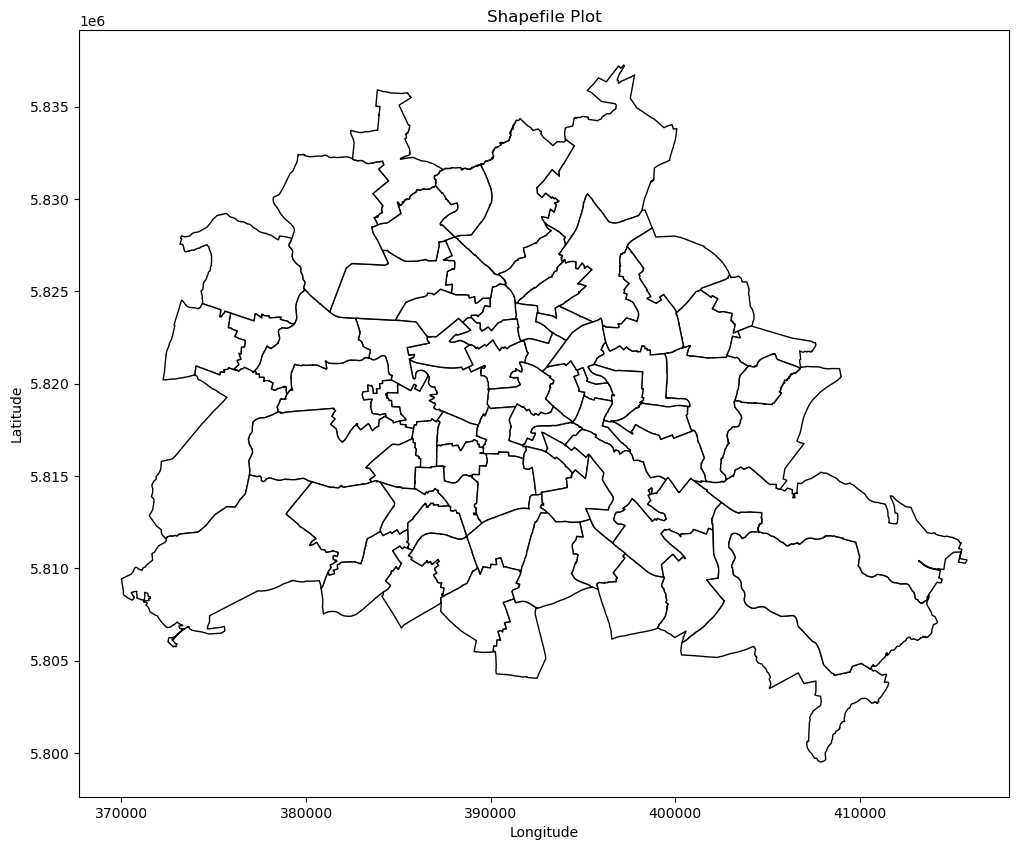

In [24]:
shapefile_path = "/Users/carlogress/Documents/MA/Data sources/RBS_OD_Wahlkreise_AH2021/AWK_AH21_25833.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='white', edgecolor='black')

# Customize the plot as needed
ax.set_title("Shapefile Plot")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [60]:
print(merged_data.columns)

Index(['gml_id', 'Gemeinde_n', 'Gemeinde_s', 'Land_name', 'Land_schlu',
       'Schluessel', 'geometry', 'E_A', 'E_E', 'foreigners_proportion'],
      dtype='object')


In [58]:
# Convert 'Gemeinde_s' column to int64 in bezirke
bezirke['Gemeinde_s'] = bezirke['Gemeinde_s'].astype(int)

# Merge bezirke with grouped_ewr
merged_data = pd.merge(bezirke, grouped_ewr, left_on='Gemeinde_s', right_on='BEZ', how='left')

# Print the merged data
print(merged_data)

                         gml_id                  Gemeinde_n  Gemeinde_s  \
0    s_wfs_alkis_bezirk.F176__1               Reinickendorf          12   
1    s_wfs_alkis_bezirk.F176__2  Charlottenburg-Wilmersdorf           4   
2    s_wfs_alkis_bezirk.F176__3            Treptow-Köpenick           9   
3    s_wfs_alkis_bezirk.F176__4                      Pankow           3   
4    s_wfs_alkis_bezirk.F176__5                    Neukölln           8   
5    s_wfs_alkis_bezirk.F176__6                 Lichtenberg          11   
6    s_wfs_alkis_bezirk.F176__7         Marzahn-Hellersdorf          10   
7    s_wfs_alkis_bezirk.F176__8                     Spandau           5   
8    s_wfs_alkis_bezirk.F176__9         Steglitz-Zehlendorf           6   
9   s_wfs_alkis_bezirk.F176__10                       Mitte           1   
10  s_wfs_alkis_bezirk.F176__11    Friedrichshain-Kreuzberg           2   
11  s_wfs_alkis_bezirk.F176__12        Tempelhof-Schöneberg           7   

   Land_name Land_schlu 

In [72]:
import plotly.express as px



# Create an interactive map with Plotly Express
fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='foreigners_proportion',
    color_continuous_scale='reds',  # Change the color scale
    hover_name='Gemeinde_n',  # Display Gemeinde name on hover
    hover_data={'foreigners_proportion': ':.2f'},
    mapbox_style="carto-positron",
    center={"lat": 52.5200, "lon": 13.4050},  # Centered on Berlin
    zoom=9,
    opacity=0.7,
    range_color=[0, max(merged_data['foreigners_proportion'])],
)

# Update layout for better readability
fig.update_layout(
    title_text='Bezirke Map with Foreigners Proportion',
    margin=dict(l=0, r=0, b=0, t=50),
    coloraxis_colorbar=dict(title='Foreigners Proportion'),
)

# Display the interactive map
fig.show()



/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_80530/2752747597.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




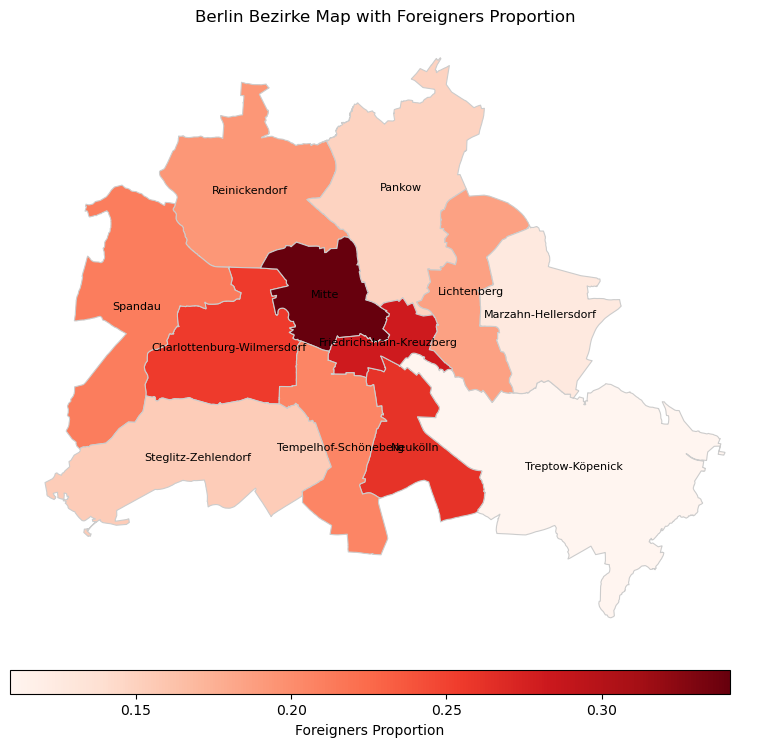

In [84]:
# Plot the map without axes, labels, and box
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Plot Bezirke with colored polygons
plot = merged_data.plot(column='foreigners_proportion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Label Gemeinde names
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Gemeinde_n']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Set title
ax.set_title('Berlin Bezirke Map with Foreigners Proportion', fontsize=12)

# Create colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=merged_data['foreigners_proportion'].min(), vmax=merged_data['foreigners_proportion'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Foreigners Proportion')

# Display the map
plt.show()


Visualizing porportions in PLR

In [103]:
# Convert the 'broker Dow' column in planungsraeume to the same data type as 'RAUMID' in merged_ewr
planungsraeume['broker Dow'] = planungsraeume['broker Dow'].astype(int)

# Assuming merged_ewr and planungsraeume are your DataFrames
planungsraeume = pd.merge(planungsraeume, merged_ewr[['RAUMID', 'foreigners_proportion']], left_on='broker Dow', right_on='RAUMID', how='left')

# Drop the redundant RAUMID column
planungsraeume = planungsraeume.drop(columns='RAUMID')

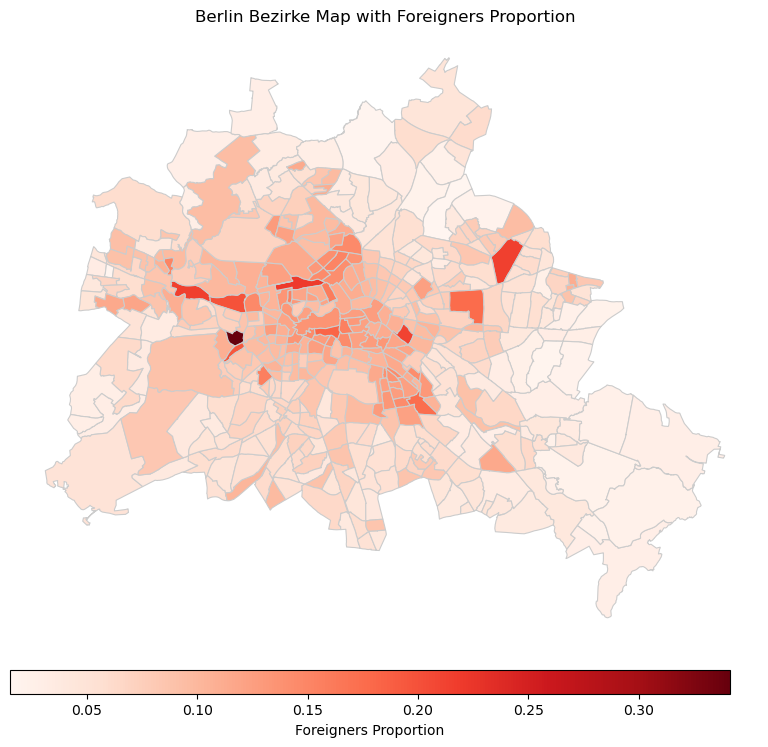

In [109]:
# Plot the map without axes, labels, and box
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Plot Bezirke with colored polygons
plot = planungsraeume.plot(column='foreigners_proportion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)


# Set title
ax.set_title('Berlin Bezirke Map with Foreigners Proportion', fontsize=12)

# Create colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=planungsraeume['foreigners_proportion'].min(), vmax=merged_data['foreigners_proportion'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Foreigners Proportion')

# Display the map
plt.show()

In [114]:
# Find the row with the maximum foreigners_proportion
max_foreigners_row = planungsraeume.loc[planungsraeume['foreigners_proportion'].idxmax()]

# Extract the values
max_foreigners_value = max_foreigners_row['foreigners_proportion']
max_broker_dow = max_foreigners_row['broker Dow']

# Print the result
print(f"Maximum Foreigners Proportion: {max_foreigners_value:.2f} for broker Dow: {max_broker_dow}")

Maximum Foreigners Proportion: 1.00 for broker Dow: 4020314


# RBS Blöcke mit Metainformationen der Wahlkreise

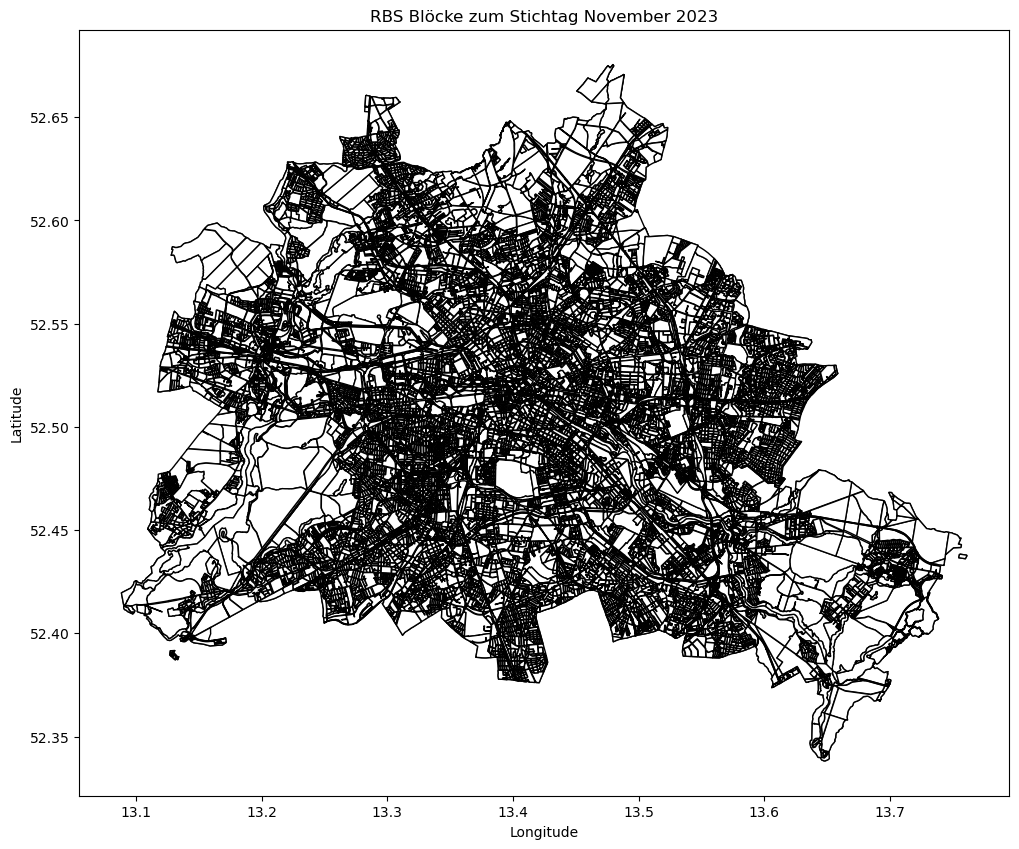

Index(['blknr', 'bez', 'bezname', 'plr', 'blktypname', 'ewk', 'area', 'datum',
       'WKR_NR', 'WKR_NAME', 'LAND_NR', 'LAND_NAME', 'geometry'],
      dtype='object')

In [174]:
shapefile_path = "/Users/carlogress/Documents/GitHub/ma_thesis/Data sources/merged_wks_rbs/merged.shp"
wks = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
wks.plot(ax=ax, color='white', edgecolor='black')

# Customize the plot as needed
ax.set_title("RBS Blöcke zum Stichtag November 2023")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
wks.columns

In [175]:
selected_rows = wks[wks['blknr'] == '040007']

# Print the selected row(s)
print(selected_rows)

       blknr bez                     bezname       plr blktypname                       ewk          area       datum  WKR_NR                           WKR_NAME LAND_NR LAND_NAME                                           geometry
8167  040007  04  Charlottenburg-Wilmersdorf  04500937      Block  mehr als 1.000 Einwohner  45065.199219  1995-02-07      80  Berlin-Charlottenburg-Wilmersdorf      11    Berlin  POLYGON ((13.29452 52.49795, 13.29431 52.49805...


In [169]:

import folium
# Filter the GeoDataFrame for blknr 001001
selected_area = gdf[gdf['blknr'] == '001001']

# Create an interactive map using folium
m = folium.Map(location=[selected_area.geometry.centroid.y.mean(), selected_area.geometry.centroid.x.mean()], zoom_start=12)

# Add the GeoDataFrame to the map
folium.GeoJson(selected_area).add_to(m)

m

/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_80530/3554288905.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


